# Import statements

In [1]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.utils import plot_model
import keras
import tensorflow as tf
from sklearn.preprocessing import normalize
import os
import numpy as np
from skimage import io
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from keras.callbacks import LearningRateScheduler

# Defining neural network and stats

In [2]:
EPOCHS = 500
def decay_schedule(epoch, lr):
    # decay by 0.1 every 5 epochs; use `% 1` to decay after each epoch
    if (epoch % 5 == 0) and (epoch != 0):
        lr = lr * 0.9
    return lr

def mlpModel(x_train, x_test, y_train, y_test, x_validate, y_validate):
    model = keras.models.Sequential()
    model.add(Dense(8, input_shape=np.shape(x_test[0]),activation='selu'))
    model.add(Dense(128,activation='selu'))
    #softplus ,selu, relu
    model.add(Dense(3, activation='sigmoid'))
    
    lr_scheduler = LearningRateScheduler(decay_schedule)

    callback = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=EPOCHS/10)
    
    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.00003),loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])#'mae',
    return model.fit(np.array(x_train),
                     np.array(y_train),
                     epochs=EPOCHS, 
                     verbose = True, 
                     batch_size = int(len(ic)*8/125),
                     callbacks=[callback], 
                     validation_data=(x_validate, y_validate)),model
    
def mlpStats(history,model):
    train_loss = history.history['loss']
    val_loss = history.history['val_loss']
    epochs = range(1, len(train_loss) + 1)
    plt.plot(epochs[1:], train_loss[1:], 'g.', label='Training loss')
    plt.plot(epochs[1:], val_loss[1:], 'b', label='Validation loss')
    plt.title('Training and validation loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()
    y_pred = model.predict(x_test)
    y_pred_bool = np.argmax(y_pred, axis=1)
    print(metrics.classification_report(y_test, y_pred_bool))
    cm = metrics.confusion_matrix(y_test, y_pred_bool) 
    sns.heatmap(cm, annot=True,cmap='icefire')

In [144]:
folder = '/Users/hazel/Desktop/Jake_Keels_imgs'
#folder = '/Users/hazel/Downloads/Image'
images = [os.path.join(root, filename)
          for root, dirs, files in os.walk(folder)
          for filename in files
          if filename.lower().endswith('.jpg')]
y_img = []
ic = []
ban = 0
ora = 0
app = 0
for img in images:
    if np.size(io.imread(img).flatten()) == 230400:
        ic.append(io.imread(img)[:,:,0].flatten())
        arr = img.split('/')
        arr = arr[np.size(arr)-1].split('\\')
        if 'ban' in arr[np.size(arr)-2].lower():
            y_img.append(0)
            ban += 1
        elif 'ora' in arr[np.size(arr)-2].lower():
            y_img.append(1)
            ora += 1
        elif 'app' in arr[np.size(arr)-2].lower():
            y_img.append(2)
            app += 1
    else:
        print(arr[np.size(arr)-3])
        print(np.size(io.imread(img).flatten()))
ic = normalize(ic,axis=1)
print('apples: {} bananas: {} oranges {} '.format(app,ban,ora))

apples: 50 bananas: 50 oranges 50 


In [182]:
x_train, x_test, y_train, y_test = train_test_split(ic, y_img,test_size=.4)
TEST_SPLIT = len(x_test) * .5
# Use np.split to chop our data into three parts.
# The second argument to np.split is an array of indices where the data will be
# split. We provide two indices, so the data will be divided into three chunks.
x_test, x_validate = np.split(x_test, [int(TEST_SPLIT)])
y_test, y_validate = np.split(y_test, [int(TEST_SPLIT)])

In [189]:
history,model= mlpModel(x_train, x_test, 
                 y_train, y_test, 
                 x_validate, y_validate)

Epoch 1/500
10/10 [==============================] - 1s 55ms/step - loss: 1.0995 - accuracy: 0.3333 - val_loss: 1.0992 - val_accuracy: 0.2667
Epoch 2/500
10/10 [==============================] - 0s 27ms/step - loss: 1.0984 - accuracy: 0.4333 - val_loss: 1.0986 - val_accuracy: 0.2667
Epoch 3/500
10/10 [==============================] - 0s 23ms/step - loss: 1.0975 - accuracy: 0.3556 - val_loss: 1.0991 - val_accuracy: 0.2667
Epoch 4/500
10/10 [==============================] - 0s 26ms/step - loss: 1.0968 - accuracy: 0.3667 - val_loss: 1.0989 - val_accuracy: 0.4333
Epoch 5/500
10/10 [==============================] - 0s 24ms/step - loss: 1.0960 - accuracy: 0.3667 - val_loss: 1.0990 - val_accuracy: 0.4000
Epoch 6/500
10/10 [==============================] - 0s 24ms/step - loss: 1.0945 - accuracy: 0.4556 - val_loss: 1.0996 - val_accuracy: 0.4333
Epoch 7/500
10/10 [==============================] - 0s 27ms/step - loss: 1.0935 - accuracy: 0.5000 - val_loss: 1.0985 - val_accuracy: 0.4667
Epoch 

10/10 [==============================] - 0s 27ms/step - loss: 0.8780 - accuracy: 0.7444 - val_loss: 0.9774 - val_accuracy: 0.6333
Epoch 116/500
10/10 [==============================] - 0s 24ms/step - loss: 0.8771 - accuracy: 0.7333 - val_loss: 0.9830 - val_accuracy: 0.6333
Epoch 117/500
10/10 [==============================] - 0s 23ms/step - loss: 0.8736 - accuracy: 0.7444 - val_loss: 0.9882 - val_accuracy: 0.6333
Epoch 118/500
10/10 [==============================] - 0s 23ms/step - loss: 0.8727 - accuracy: 0.7222 - val_loss: 0.9881 - val_accuracy: 0.6333
Epoch 119/500
10/10 [==============================] - 0s 24ms/step - loss: 0.8721 - accuracy: 0.7111 - val_loss: 0.9715 - val_accuracy: 0.6000
Epoch 120/500
10/10 [==============================] - 0s 27ms/step - loss: 0.8669 - accuracy: 0.7222 - val_loss: 0.9735 - val_accuracy: 0.6333
Epoch 121/500
10/10 [==============================] - 0s 24ms/step - loss: 0.8650 - accuracy: 0.7444 - val_loss: 0.9880 - val_accuracy: 0.6000
Epoch 

Epoch 172/500
10/10 [==============================] - 0s 25ms/step - loss: 0.7441 - accuracy: 0.7889 - val_loss: 0.9023 - val_accuracy: 0.6333
Epoch 173/500
10/10 [==============================] - 0s 23ms/step - loss: 0.7418 - accuracy: 0.7889 - val_loss: 0.9102 - val_accuracy: 0.6333
Epoch 174/500
10/10 [==============================] - 0s 25ms/step - loss: 0.7384 - accuracy: 0.8000 - val_loss: 0.9017 - val_accuracy: 0.6333
Epoch 175/500
10/10 [==============================] - 0s 26ms/step - loss: 0.7379 - accuracy: 0.7889 - val_loss: 0.8979 - val_accuracy: 0.6333
Epoch 176/500
10/10 [==============================] - 0s 23ms/step - loss: 0.7385 - accuracy: 0.8000 - val_loss: 0.9224 - val_accuracy: 0.6333
Epoch 177/500
10/10 [==============================] - 0s 25ms/step - loss: 0.7332 - accuracy: 0.8111 - val_loss: 0.9080 - val_accuracy: 0.6333
Epoch 178/500
10/10 [==============================] - 0s 24ms/step - loss: 0.7347 - accuracy: 0.7889 - val_loss: 0.8966 - val_accuracy:

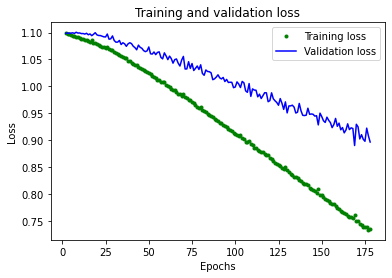

              precision    recall  f1-score   support

           0       0.64      0.64      0.64        11
           1       1.00      0.40      0.57        10
           2       0.40      0.67      0.50         9

    accuracy                           0.57        30
   macro avg       0.68      0.57      0.57        30
weighted avg       0.69      0.57      0.57        30



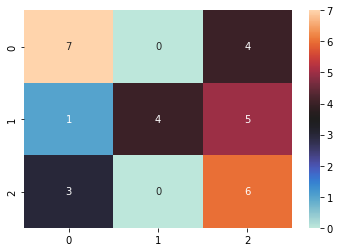

In [190]:
mlpStats(history,model)